In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
visitationFile = "F:\\Azycon\\Visitation.xlsx"
meteorologyFile = "F:\\Azycon\\Meteorology.xlsx"

In [16]:
visitationData = pd.read_excel(visitationFile)
meterologyData = pd.read_excel(meteorologyFile)

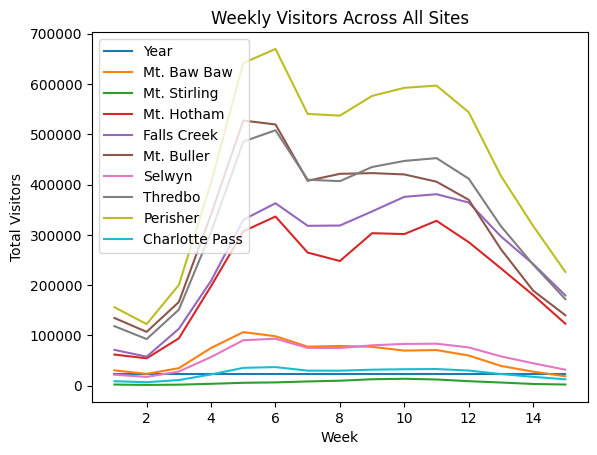

In [17]:
# Adding total visitor of each week per sites.
weeklyVisitationPerSite = visitationData.groupby('Week').sum().reset_index()
x = weeklyVisitationPerSite['Week']
for site in weeklyVisitationPerSite.columns[1:]:
    y = weeklyVisitationPerSite[site]
    plt.plot(x, y, label=site)

plt.xlabel('Week')
plt.ylabel('Total Visitors')
plt.title('Weekly Visitors Across All Sites')
plt.legend()
plt.show()

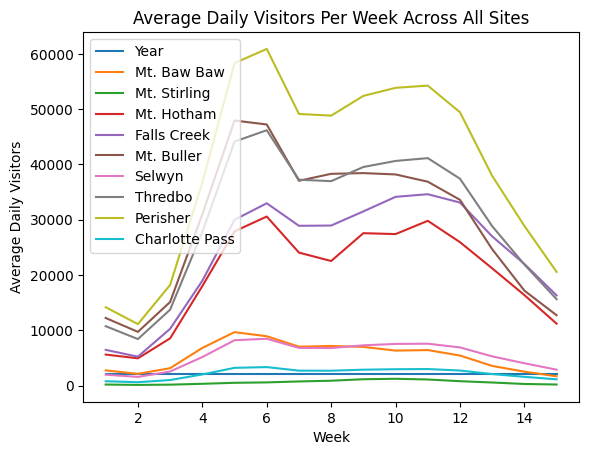

In [18]:
#Calculate the average of daily visitor per week per site
weeklyAvgVisitationPerSite = visitationData.groupby('Week').mean().reset_index()
x = weeklyAvgVisitationPerSite['Week']
for site in weeklyAvgVisitationPerSite.columns[1:]:
    y = weeklyAvgVisitationPerSite[site]
    plt.plot(x, y, label=site)
plt.xlabel('Week')
plt.ylabel('Average Daily Visitors')
plt.title('Average Daily Visitors Per Week Across All Sites')
plt.legend()
plt.show()


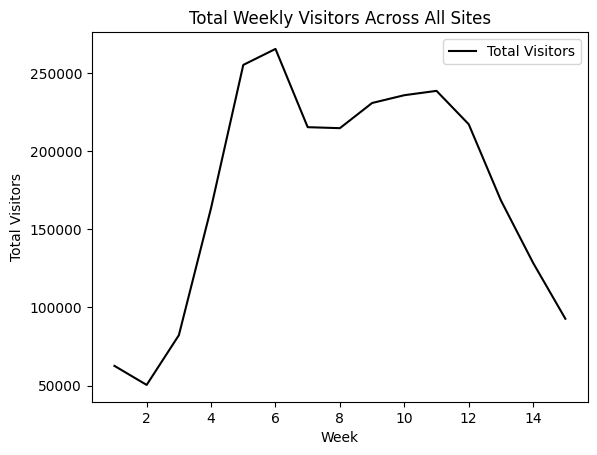

In [19]:
weeklyVisitationPerSite['TotalVisitors'] = weeklyVisitationPerSite.iloc[:, 1:].mean(axis=1)
plt.plot(weeklyVisitationPerSite['Week'], weeklyVisitationPerSite['TotalVisitors'], label='Total Visitors', color='black')
plt.xlabel('Week')
plt.ylabel('Total Visitors')
plt.title('Total Weekly Visitors Across All Sites')
plt.legend()
plt.show()

# Meterology Data Clean Ups, and analysis

In [24]:
# Clean the datas by:
# For each years, remove all days before 9-Jun and After 15-Sep
mask = (
    ((meterologyData['Month'] == 6) & (meterologyData['Day'] >= 9)) |
    ((meterologyData['Month'] > 6) & (meterologyData['Month'] < 9)) |
    ((meterologyData['Month'] == 9) & (meterologyData['Day'] <= 15))
)

filteredMeterologyData = meterologyData[mask]